# Project  : Flight Booking Price Prediction

## Problem Statement

 The objective is to analyze the flight 
booking dataset obtained from a 
platform which is used to book flight 
tickets. A thorough study of the data 
will aid in the discovery of valuable 
insights that will be of enormous 
value to passengers. Apply EDA, 
statistical methods and Machine 
learning algorithms in order to get 
meaningful information from it

## Dataset Information

Flight booking price prediction dataset contains around 3 lacs records
 with 11 attributes 

## Importing the Libraries

We start off this project by importing all the necessary libraries that will be required for the process.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [35]:
df = pd .read_csv("C:\\Users\\athir\\Downloads\\Flight_Booking.csv")

In [36]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [37]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Loading the Data

Checking the shape of a dataframe and datatypes of 
all columns along with calculating the statistical 
data

In [38]:
df.shape

(300153, 11)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [40]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Missing Values 

Checking out the missing values in a dataframe

In [41]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Data Visualization

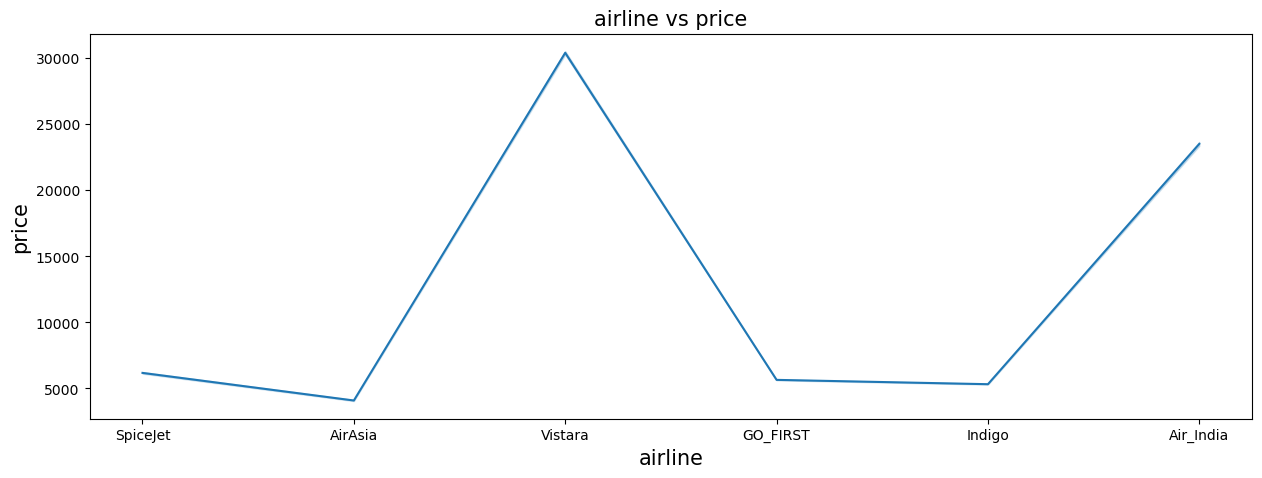

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df['airline'],y = df['price'])
plt.title("airline vs price",fontsize = 15)
plt.xlabel("airline",fontsize = 15)
plt.ylabel("price",fontsize = 15)
plt.show()

There is a variation in price with different airlines

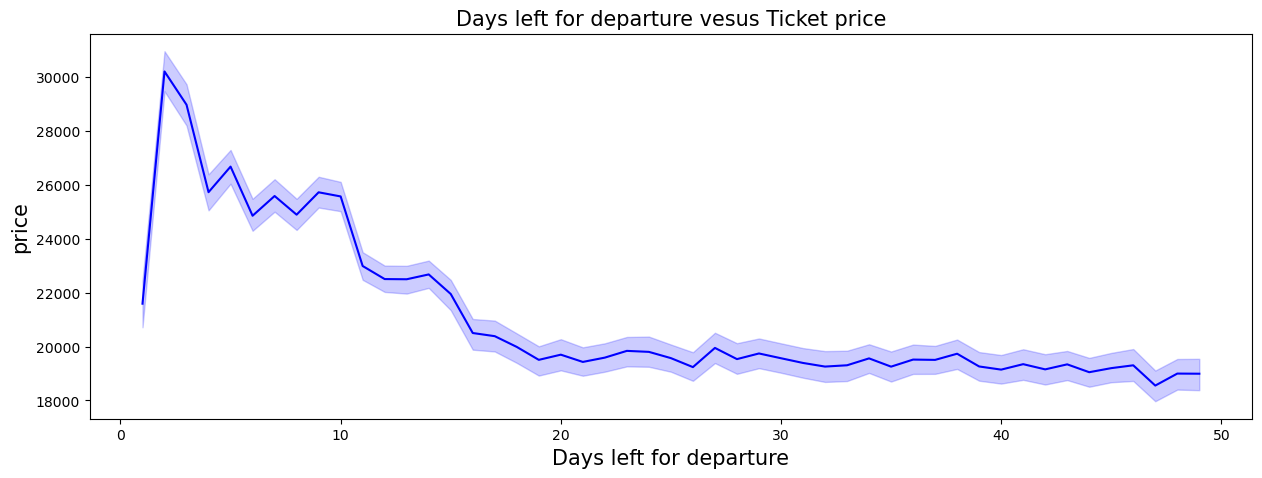

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='days_left', y='price', color = "blue")
plt.title("Days left for departure vesus Ticket price", fontsize=15)
plt.xlabel("Days left for departure",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.show()

The price of the ticket 
increases as the days left for 
departure decreases 

<Axes: xlabel='airline', ylabel='price'>

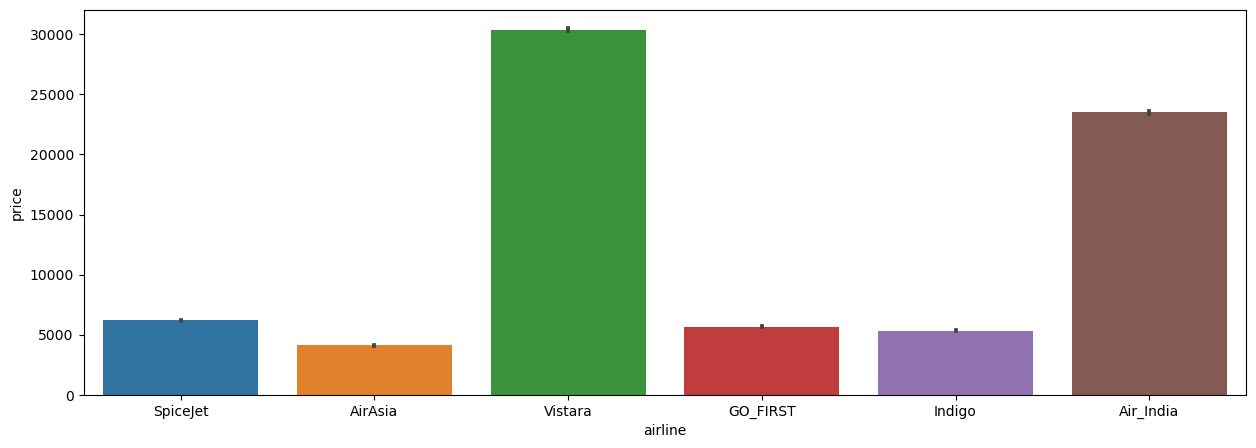

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x='airline', y='price', data=df)

 Price range of all the flights

<Axes: xlabel='class', ylabel='price'>

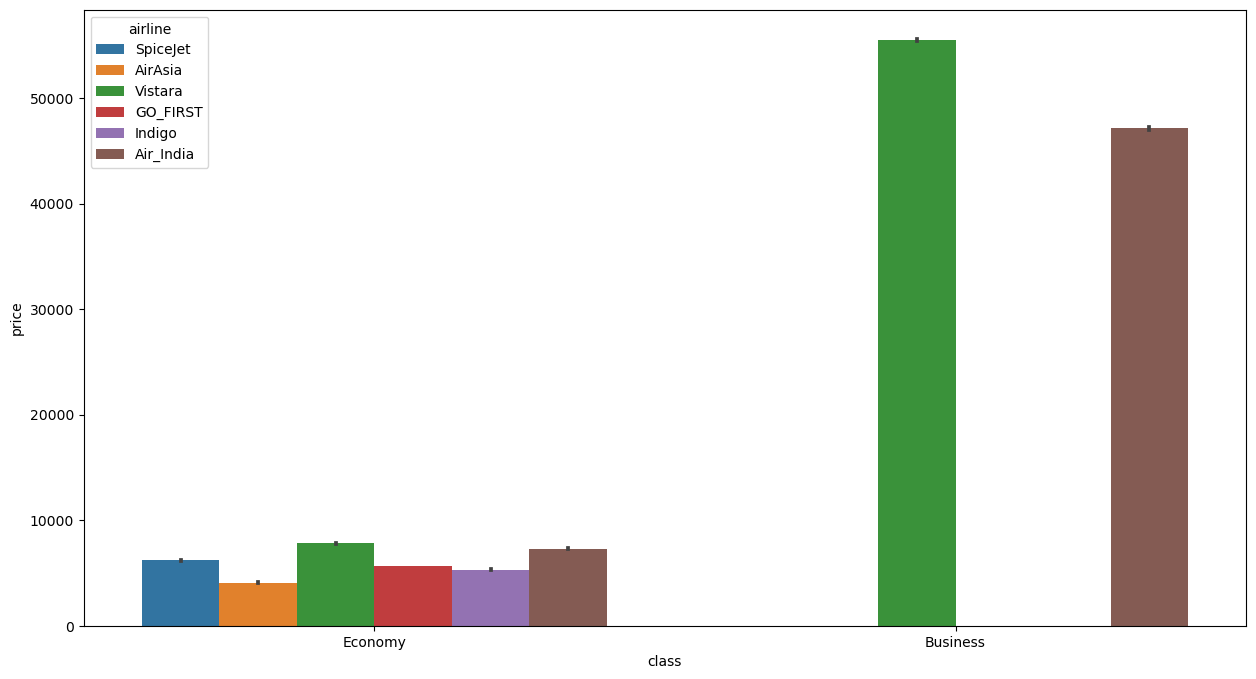

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x='class',y = 'price',data=df,hue='airline')

 Range of price of all the 
flights of Economy and 
Business class

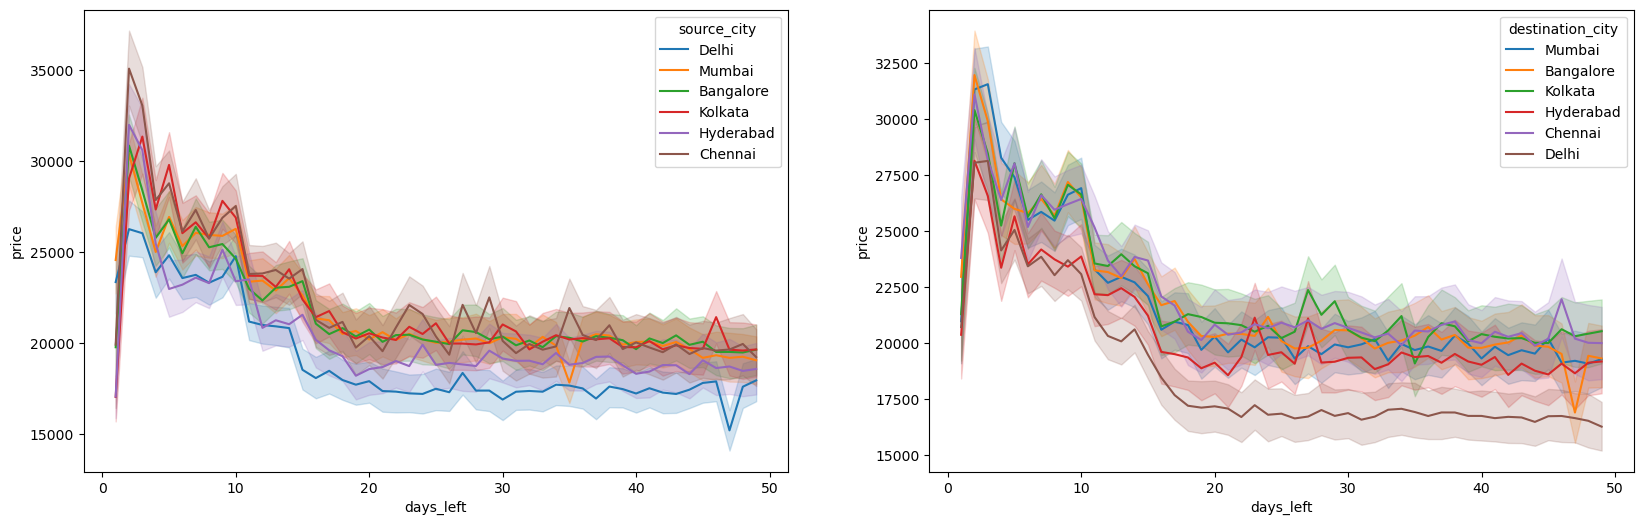

In [46]:
fi,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x = 'days_left', y = 'price',data =df, hue='source_city',ax=ax[0])
sns.lineplot(x='days_left', y = 'price', data = df, hue='destination_city', ax=ax[1])
plt.show()

 Range of price of flights with source 
and destination city according to 
the  days left

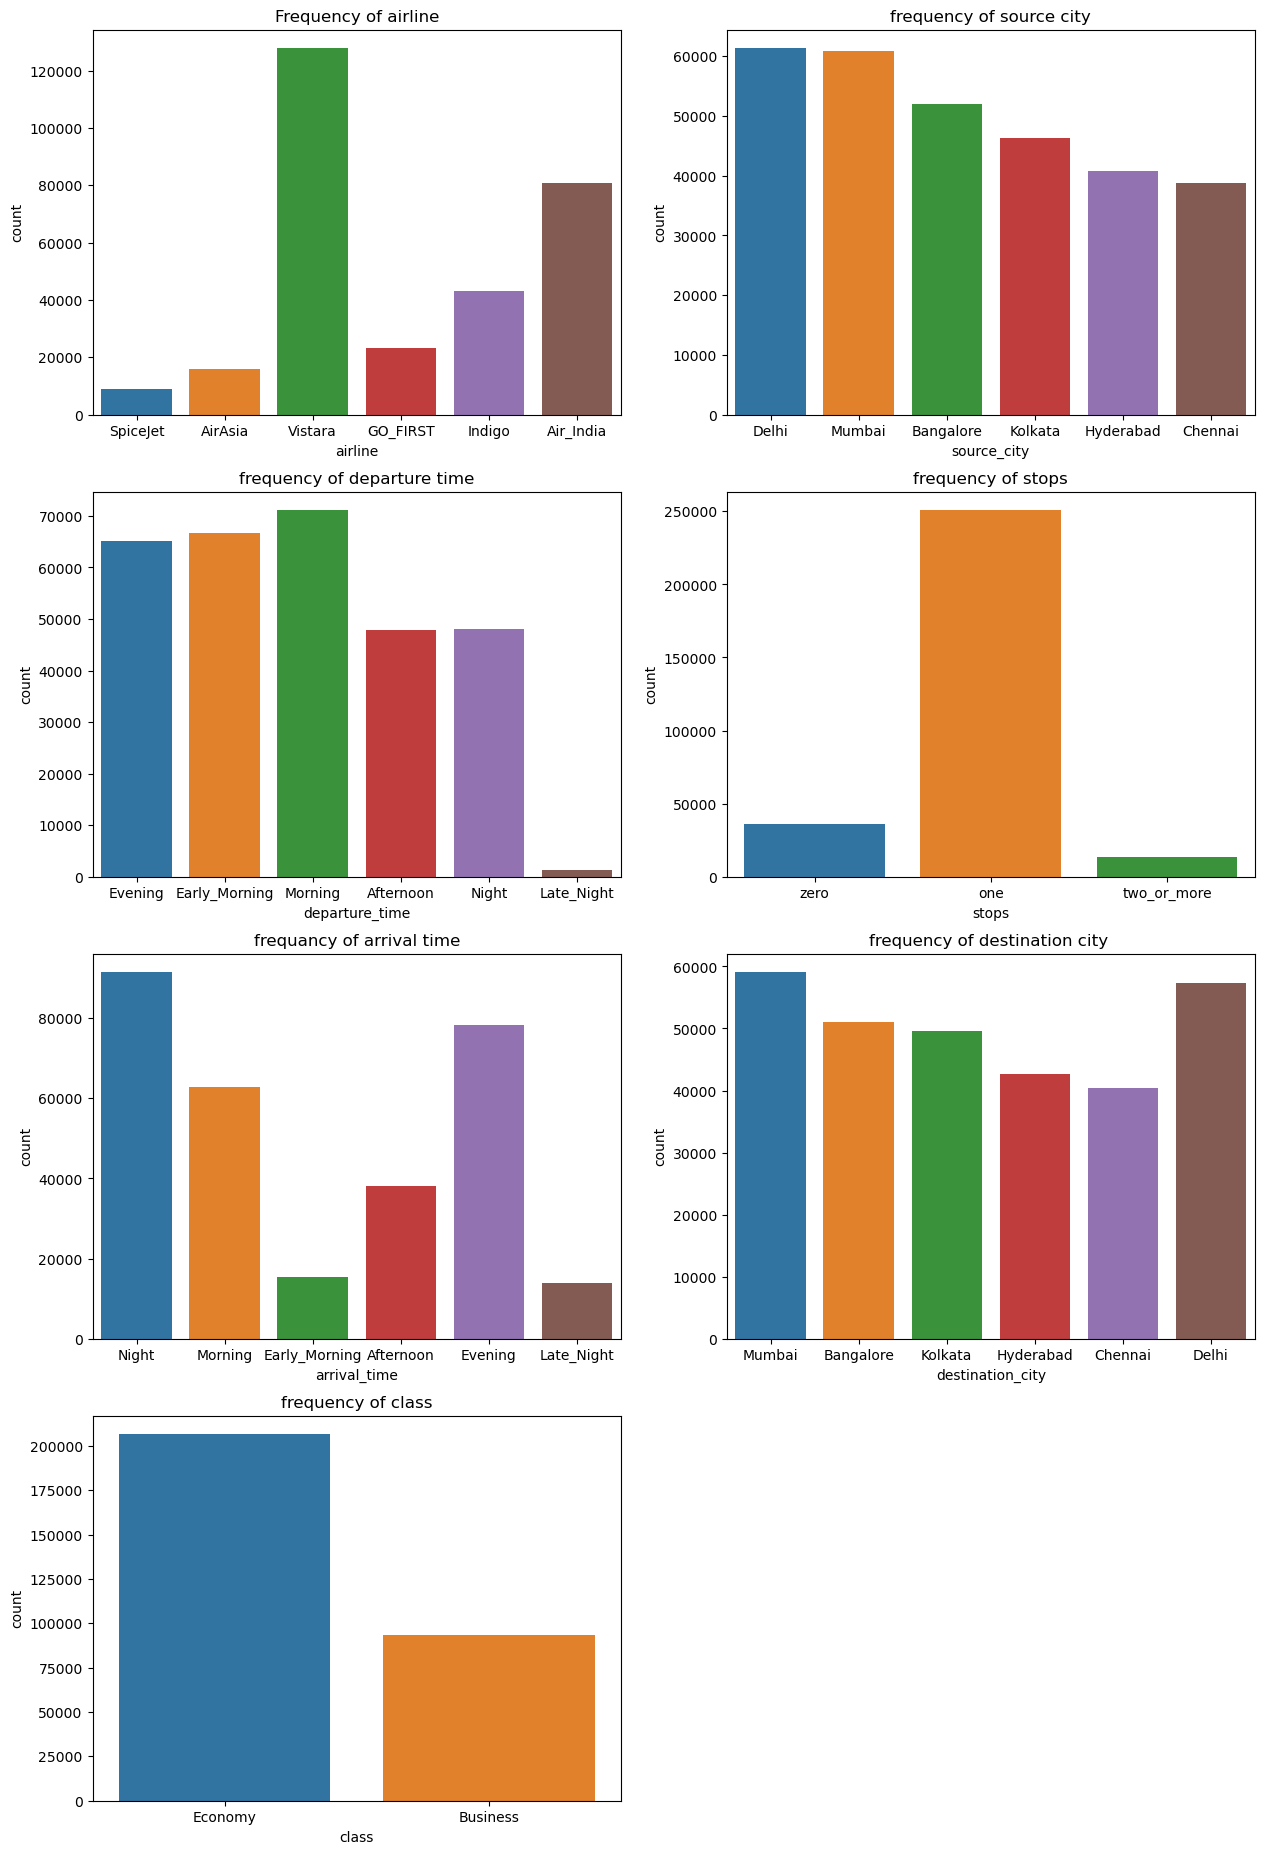

In [47]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df["airline"],data=df)
plt.title("Frequency of airline")

plt.subplot(4,2,2)
sns.countplot(x=df["source_city"],data=df)
plt.title("frequency of source city")

plt.subplot(4,2,3)
sns.countplot(x=df["departure_time"],data=df)
plt.title("frequency of departure time")

plt.subplot(4,2,4)
sns.countplot(x=df["stops"],data=df)
plt.title("frequency of stops")

plt.subplot(4,2,5)
sns.countplot(x=df["arrival_time"],data = df)
plt.title("frequancy of arrival time")

plt.subplot(4,2,6)
sns.countplot(x=df["destination_city"],data=df)
plt.title("frequency of destination city ")

plt.subplot(4,2,7)
sns.countplot(x=df["class"],data=df)
plt.title("frequency of class")

plt.show()

 Visualization of categorical features with countplot

## Label Encoding

Performing One Hot Encoding for categorical features of a 
dataframe

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df["airline"]= le.fit_transform(df["airline"])
df["source_city"]= le.fit_transform(df["source_city"])
df["departure_time"]= le.fit_transform(df["departure_time"])
df["stops"]= le.fit_transform(df["stops"])
df["arrival_time"]= le.fit_transform(df["arrival_time"])
df["destination_city"]= le.fit_transform(df["destination_city"])
df["class"]= le.fit_transform(df["class"])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


## Feature Selection

C:\Users\athir\AppData\Local\Temp\ipykernel_25292\3589858971.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


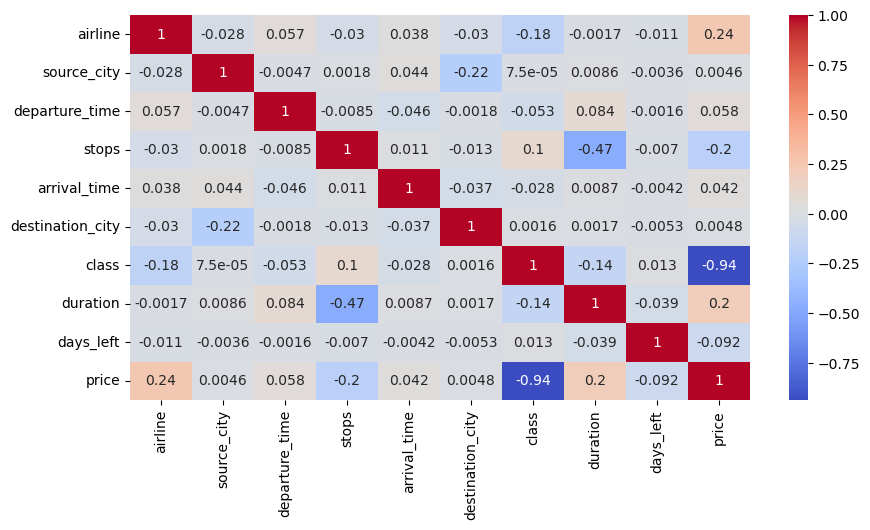

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

Plotting the correlation 
graph to see the 
correlation between 
features and dependent 
variable.

## Feature Selection

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col !='price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


Selecting the features using VIF. VIF should be less than 5.All features are having VIF less than 5. 

## Linear Regression

 Applying standardization and implementing Linear Regression Model to 
predict the price of a flight.

In [61]:
X = df.drop(columns=["price","flight"])
y = df["price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_value","predicted_value"])
difference


,Actual_value,predicted_value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.904554350718816

In [67]:
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

4624.99486801689

In [69]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.43535810896832944

In [70]:
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

49200540.293721996

In [71]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

7014.3096804833185

 Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) 
of the Linear regression model is 7014.30 and Mean absolute percentage 
error(MAPE) is 43 percent. Lower the RMSE and MAPE better the model.

C:\Users\athir\AppData\Local\Temp\ipykernel_25292\1514020514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\athir\AppData\Local\Temp\ipykernel_25292\1514020514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


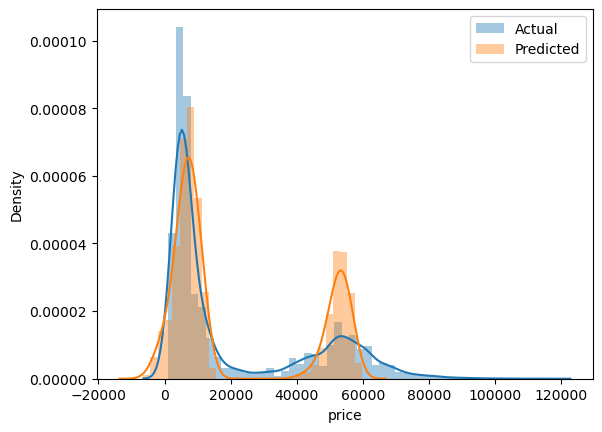

In [73]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

Plotting the graph of actual 
and predicted price of flight

## Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)

0.9754244691996211

In [78]:
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1176.4915266001456

In [79]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.0740170106601322

In [81]:
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error


12668250.491141152

In [82]:
roor_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

7014.3096804833185

Mean absolute percentage 
error is 7.4 percent and RMSE 
is 7014 

## Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
r2_score(y_test,y_pred)

0.9849557718446208

In [88]:
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1090.4261887190355

In [91]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.07038254900778647

In [92]:
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

7755032.933623727

In [94]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2784.7859762688636

 Mean absolute percentage 
error is  7.0 percent and RMSE 
is 2784 which is less than the 
linear regression and decision 
tree model

C:\Users\athir\AppData\Local\Temp\ipykernel_25292\1514020514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\athir\AppData\Local\Temp\ipykernel_25292\1514020514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


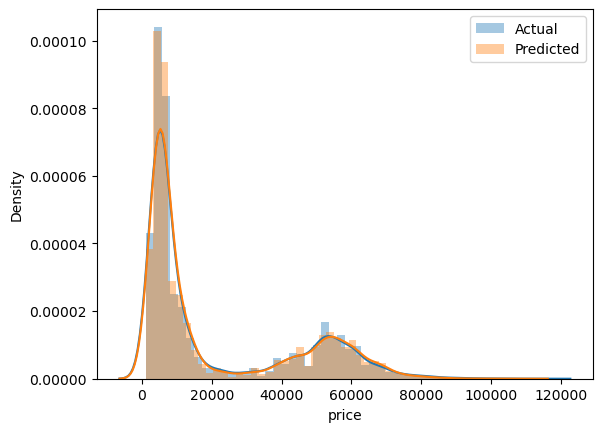

In [96]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()